# Exploring Campaign 1

Let's take a look at campaign 1 of Critical Role: Vox Machina! This was the inaugural campaign, picking up in the middle of a home game and coming to actual play for the first time. We might expect to see some major changes as the campaign goes along. Some things to look at:

- Do the different actors have different profiles in terms of how much they speak and how long their dialogue is?
- Do these change over time - do they become more or less active or verbose?

## Loading the Data

First, we need to load all the data we want to look at, which is all episodes of campaign 1. We have a database that includes information for each episode, as well as pre-processed transcripts for each episode.

In [194]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

def_max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', 200)

In [72]:
data_dir = '../../data'
db_file = f'{data_dir}/transcript_database.csv'

db = pd.read_csv(
    db_file,
    parse_dates = ['download_date']
)
drop_cols = ['section', 'section_no', 'link', 'download_date']
campaign1_db = db.loc[db['section_no'] == 1].drop(drop_cols, axis = 1)
campaign1_db

,subsection_no,episode_no,subsection,episode,transcript_file
0,1,1,Arc 1: Kraghammer and Vasselheim,Arrival_at_Kraghammer,section001/subsection001/episode001.csv
1,1,2,Arc 1: Kraghammer and Vasselheim,Into_the_Greyspine_Mines,section001/subsection001/episode002.csv
2,1,3,Arc 1: Kraghammer and Vasselheim,Strange_Bedfellows,section001/subsection001/episode003.csv
3,1,4,Arc 1: Kraghammer and Vasselheim,Attack_on_the_Duergar_Warcamp,section001/subsection001/episode004.csv
4,1,5,Arc 1: Kraghammer and Vasselheim,The_Trick_about_Falling,section001/subsection001/episode005.csv
5,1,6,Arc 1: Kraghammer and Vasselheim,Breaching_the_Emberhold,section001/subsection001/episode006.csv
6,1,7,Arc 1: Kraghammer and Vasselheim,The_Throne_Room,section001/subsection001/episode007.csv
7,1,8,Arc 1: Kraghammer and Vasselheim,Glass_and_Bone,section001/subsection001/episode008.csv
8,1,9,Arc 1: Kraghammer and Vasselheim,Yug%27Voril_Uncovered,section001/subsection001/episode009.csv
9,1,10,Arc 1: Kraghammer and Vasselheim,K%27Varn_Revealed,section001/subsection001/episode010.csv


There are 115 episodes in campaign 1, split into 5 arcs.

In [73]:
print(campaign1_db['subsection'].value_counts())

subsection
Arc 3: The Chroma Conclave          46
Arc 1: Kraghammer and Vasselheim    23
Arc 5: Vecna                        16
Arc 2: The Briarwoods               15
Arc 4: Taryon Darrington            15
Name: count, dtype: int64


Now, let's get all the transcripts into a single giant `DataFrame`.

In [74]:
def GetTranscript(arc_no, ep_no, transcript_file):
    df = pd.read_csv(f'{data_dir}/{transcript_file}')
    df.insert(0, 'arc_no', arc_no)
    df.insert(1, 'episode_no', ep_no)
    return df

transcripts = pd.DataFrame()
for index, row in campaign1_db.iterrows():
    transcripts = pd.concat([
        transcripts,
        GetTranscript(row['subsection_no'], row['episode_no'], row['transcript_file'])        
    ])
transcripts.reset_index(inplace = True)
transcripts.drop('index', axis = 1, inplace = True)
transcripts

,arc_no,episode_no,section_no,line_no,section,speaker,line
0,1,1,1,1,Pre-Show,MATT,"Hello everyone. My name is Matthew Mercer, voi..."
1,1,1,1,2,Pre-Show,TRAVIS,"Right, listen up! If you have ale, then you ha..."
2,1,1,1,3,Pre-Show,TRAVIS,[record scratch] Wait.\n
3,1,1,1,4,Pre-Show,TRAVIS (CONT'D),"Easily the brains of the group, Grog is often ..."
4,1,1,1,5,Pre-Show,MARISHA,A first impression of Keyleth would leave you ...
...,...,...,...,...,...,...,...
291615,5,16,4,1236,Part II,MARISHA,That was beautiful.
291616,5,16,4,1237,Part II,SAM,"Thanks, Matt. That was really nice."
291617,5,16,4,1238,Part II,MATT,"Love you, guys."
291618,5,16,4,1239,Part II,LAURA,"Love you, Matthew."


We have nearly 300,000 rows, so a good dataset to work with.

## Initial Data Inspection

We can first look at the data to see what sections are included in each episode.

In [75]:
pd.crosstab(
    transcripts['arc_no'].astype(str) + '-' + transcripts['episode_no'].apply('{:02d}'.format),
    transcripts['section']
)

section,Announcements and Break,Break,Gameplay,Part I,Part II,Post-Game,Post-Game and Q&A,Post-Show,Pre-Show,Q & A,Q & A Session,The Story of Vox Machina
row_0,,,,,,,,,,,,
1-01,0,11,0,1049,1080,0,0,0,55,0,0,0
1-02,0,9,0,1325,1601,0,0,0,14,0,0,0
1-03,0,2,0,1513,1431,0,0,0,0,0,0,0
1-04,191,0,0,2263,0,0,0,0,43,0,1087,0
1-05,0,18,0,1553,2003,0,0,0,21,0,0,0
1-06,0,15,0,1543,1120,0,0,0,30,0,0,0
1-07,0,1,0,1192,1352,0,0,0,22,0,0,0
1-08,0,0,0,1942,0,0,0,140,7,0,0,0
1-09,0,1,0,918,945,0,0,0,71,0,0,0


Looking at this breakdown, it seems that the episodes generally have a lot of data in 'Part I' and 'Part II'. Some episodes only have a 'Part I', and there are some with various other sections, particularly early in the campaign. These tend to be Q&As with various names. Also note episode 1-12, which, if we look above is 'Dungeons & Dragons Campaign Tips', so no actual play in the campaign. So let's remove that episode and only look at dialogue in 'Part I' and 'Part II' from each episode.

In [76]:
filtered_transcripts = transcripts.query('~(arc_no == 1 & episode_no == 12) & (section == "Part I" | section == "Part II")')
filtered_transcripts.reset_index(inplace = True)

In [77]:
pd.crosstab(
    filtered_transcripts['arc_no'].astype(str) + '-' + filtered_transcripts['episode_no'].apply('{:02d}'.format),
    filtered_transcripts['section']
)

section,Part I,Part II
row_0,,
1-01,1049,1080
1-02,1325,1601
1-03,1513,1431
1-04,2263,0
1-05,1553,2003
1-06,1543,1120
1-07,1192,1352
1-08,1942,0
1-09,918,945


In [82]:
speaker_counts = filtered_transcripts['speaker'].value_counts()
print(speaker_counts[speaker_counts > 10])

speaker
MATT                    77892
LAURA                   40203
SAM                     29845
MARISHA                 29699
TRAVIS                  27194
TALIESIN                26151
LIAM                    24868
ASHLEY                   7638
ORION                    4802
MARY                     1235
WILL                     1183
PATRICK                   757
JON                       547
FELICIA                   535
CHRIS                     492
JOE                       461
WIL                       384
ALL                       356
ZAC                       343
NOELLE                    318
DARIN                     273
JASON                      88
KIT                        81
LAURA and MARISHA          81
TALIESIN and MARISHA       69
LAURA and LIAM             53
MARISHA and TALIESIN       45
TRAVIS and LAURA           41
LIAM and LAURA             37
SAM and TALIESIN           34
LAURA and TRAVIS           34
LAURA and SAM              31
LAURA and TALIESIN         31
LA

Here we can see that the main cast definitely have the most lines, with at least 4500 each. Ashley and Orion have fewer than the rest - Ashley because she was absent filming a TV show, and Orion because he left partway through the season. Guest stars had varying numbers of lines, but let's look just at the main cast.

In [90]:
main_cast = speaker_counts[speaker_counts > 4500].index.to_list()
main_cast_transcripts = filtered_transcripts[filtered_transcripts['speaker'].isin(main_cast)]
main_cast_transcripts.reset_index(inplace = True)
main_cast_transcripts

,level_0,index,arc_no,episode_no,section_no,line_no,section,speaker,line
0,0,55,1,1,2,1,Part I,MATT,All right! Let's jump on in. Thank you. Last w...
1,1,56,1,1,2,2,Part I,TRAVIS,Son of a bitch.
2,2,57,1,1,2,3,Part I,MATT,"Yep, the barbarian for his first and only time..."
3,3,58,1,1,2,4,Part I,TRAVIS,Next time he dies.
4,4,59,1,1,2,5,Part I,MATT,Yeah. Essentially. Which managed to not turn i...
...,...,...,...,...,...,...,...,...,...
268287,276690,291615,5,16,4,1236,Part II,MARISHA,That was beautiful.
268288,276691,291616,5,16,4,1237,Part II,SAM,"Thanks, Matt. That was really nice."
268289,276692,291617,5,16,4,1238,Part II,MATT,"Love you, guys."
268290,276693,291618,5,16,4,1239,Part II,LAURA,"Love you, Matthew."


In [95]:
main_cast_lines = main_cast_transcripts['speaker'].value_counts()
main_cast_lines

speaker
MATT        77892
LAURA       40203
SAM         29845
MARISHA     29699
TRAVIS      27194
TALIESIN    26151
LIAM        24868
ASHLEY       7638
ORION        4802
Name: count, dtype: int64

## Data Visualizations

Let's define some colors for each cast member and their character (or DM):

In [183]:
vm_palette = {
    'MATT':     '#9f6701', #brown
    'LAURA':    '#209bc7', #cerulean blue
    'SAM':      '#971287', #royal purple
    'MARISHA':  '#228B22', #forest green
    'TRAVIS':   '#bcbcbc', #grey
    'TALIESIN': '#2020a0', #navy blue
    'LIAM':     '#333333', #charcoal
    'ASHLEY':   '#ffd700', #gold
    'ORION':    '#600300'  #rust red
}
speaker_order  = list(vm_palette.keys())
print(speaker_order)

['MATT', 'LAURA', 'SAM', 'MARISHA', 'TRAVIS', 'TALIESIN', 'LIAM', 'ASHLEY', 'ORION']


Now we can look at how the number of lines breaks down graphically.

<Axes: ylabel='count'>

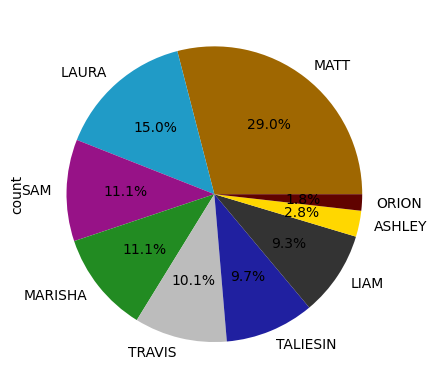

In [117]:
main_cast_lines.plot.pie(
    colors  = vm_palette.values(),
    autopct = '%1.1f%%'
)

As we might expect, Matt spends the most time talking, as he is the DM. The other cast members are fairly equal, with Laura taking the second place in terms of number of lines.

In [163]:
main_cast_transcripts.loc[:, 'speaker'] = main_cast_transcripts.speaker.astype("category").cat.set_categories(speaker_order)
main_cast_transcripts.loc[:, 'linelength'] = [len(x) for x in main_cast_transcripts['line']]
part_summary = main_cast_transcripts \
    .groupby(['section', 'speaker'], as_index = False) \
    .agg({'line': 'count', 'linelength': 'mean'})
part_summary

,section,speaker,line,linelength
0,Part I,MATT,40001,122.644509
1,Part I,LAURA,21317,37.851199
2,Part I,SAM,15852,42.091282
3,Part I,MARISHA,14689,43.821227
4,Part I,TRAVIS,14969,36.346182
5,Part I,TALIESIN,13281,49.306679
6,Part I,LIAM,12722,47.726065
7,Part I,ASHLEY,3630,31.679063
8,Part I,ORION,2551,46.435907
9,Part II,MATT,37891,111.883693


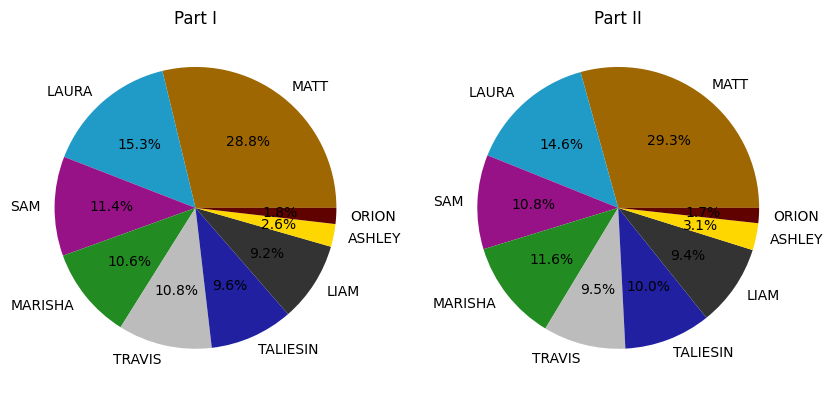

In [164]:
p1_summary = part_summary[part_summary['section'] == 'Part I']
p2_summary = part_summary[part_summary['section'] == 'Part II']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 20))

ax1.pie(
    p1_summary['line'],
    labels  = p1_summary['speaker'],
    autopct = '%1.1f%%',
    colors  = [vm_palette[x] for x in p1_summary['speaker']]
)
ax1.set_title('Part I')
ax2.pie(
    p2_summary['line'],
    labels  = p2_summary['speaker'],
    autopct = '%1.1f%%',
    colors  = [vm_palette[x] for x in p2_summary['speaker']]
)
ax2.set_title('Part II')
plt.show()

As might be expected, the percentage of speaking doesn't change much between the parts of the show. They are basically the same format split by a break, and we will just used the combined data going forward.

# Per-Episode Breakdown

Let's look at how speaking percentage changed across episodes. Maybe someone started talking much less but ended up talking more, and we should be able to see when Ashley was absent.

In [179]:
episode_summary = main_cast_transcripts.groupby(['arc_no', 'episode_no', 'speaker'], observed = True, as_index = False).agg({'line': 'count', 'linelength': 'mean'})
episode_summary['episode_index'] = (episode_summary['arc_no'] * 100 + episode_summary['episode_no']).rank(method = 'dense')
episode_summary['episode_label'] = episode_summary['arc_no'].astype(str) + '-' + episode_summary['episode_no'].astype(str)
episode_summary

,arc_no,episode_no,speaker,line,linelength,episode_index,episode_label
0,1,1,MATT,709,116.506347,1.0,1-1
1,1,1,LAURA,347,37.106628,1.0,1-1
2,1,1,SAM,240,32.162500,1.0,1-1
3,1,1,MARISHA,180,34.122222,1.0,1-1
4,1,1,TRAVIS,189,31.899471,1.0,1-1
...,...,...,...,...,...,...,...
848,5,16,MARISHA,266,45.225564,114.0,5-16
849,5,16,TRAVIS,296,37.402027,114.0,5-16
850,5,16,TALIESIN,227,48.061674,114.0,5-16
851,5,16,LIAM,94,49.563830,114.0,5-16


In [181]:
episode_speakers = episode_summary.pivot(index = 'speaker', columns = 'episode_index', values = 'line').fillna(0)
episode_speakers

episode_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0
speaker,,,,,,,,,,,,,,,,,,,,,
MATT,709.0,921.0,678.0,601.0,1001.0,658.0,887.0,633.0,559.0,517.0,...,412.0,593.0,824.0,361.0,806.0,669.0,538.0,984.0,1140.0,455.0
LAURA,347.0,465.0,629.0,81.0,633.0,418.0,281.0,302.0,264.0,285.0,...,289.0,358.0,333.0,242.0,400.0,386.0,443.0,529.0,401.0,273.0
SAM,240.0,278.0,338.0,358.0,0.0,303.0,282.0,190.0,178.0,212.0,...,274.0,218.0,159.0,181.0,232.0,265.0,295.0,384.0,541.0,295.0
MARISHA,180.0,260.0,345.0,170.0,312.0,218.0,274.0,214.0,162.0,170.0,...,184.0,244.0,224.0,184.0,202.0,243.0,329.0,306.0,329.0,266.0
TRAVIS,189.0,340.0,235.0,231.0,375.0,204.0,0.0,0.0,169.0,156.0,...,240.0,264.0,355.0,127.0,289.0,280.0,288.0,324.0,390.0,296.0
TALIESIN,116.0,183.0,120.0,143.0,200.0,120.0,108.0,104.0,144.0,139.0,...,153.0,156.0,295.0,130.0,186.0,245.0,191.0,275.0,292.0,227.0
LIAM,159.0,281.0,306.0,342.0,484.0,351.0,323.0,178.0,215.0,194.0,...,143.0,177.0,202.0,164.0,389.0,333.0,249.0,247.0,279.0,94.0
ASHLEY,0.0,0.0,0.0,143.0,257.0,174.0,124.0,160.0,0.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,43.0,125.0,146.0,115.0
ORION,164.0,181.0,265.0,159.0,246.0,176.0,203.0,149.0,141.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
arc_episodes = episode_summary[['arc_no', 'episode_no', 'episode_index', 'episode_label']].drop_duplicates()

arc_info = campaign1_db[['subsection_no', 'subsection']] \
    .drop_duplicates() \
    .rename(columns = {'subsection_no': 'arc_no', 'subsection': 'arc_name'})
arc_info['arc_color'] = ['#bfb5b2', '#83b58e', '#5e3c58', '#ba9a74', '#2e4045']
arc_episodes = arc_episodes.merge(arc_info, on = 'arc_no')
arc_summary = arc_episodes \
    .groupby(['arc_no', 'arc_name', 'arc_color']) \
    .agg({'episode_index': ['min', 'max']}) \
    .reset_index()
arc_summary.columns = ["_".join(col_name).rstrip('_') for col_name in arc_summary.columns.to_flat_index()]
arc_summary

,arc_no,arc_name,arc_color,episode_index_min,episode_index_max
0,1,Arc 1: Kraghammer and Vasselheim,#bfb5b2,1.0,22.0
1,2,Arc 2: The Briarwoods,#83b58e,23.0,37.0
2,3,Arc 3: The Chroma Conclave,#5e3c58,38.0,83.0
3,4,Arc 4: Taryon Darrington,#ba9a74,84.0,98.0
4,5,Arc 5: Vecna,#2e4045,99.0,114.0


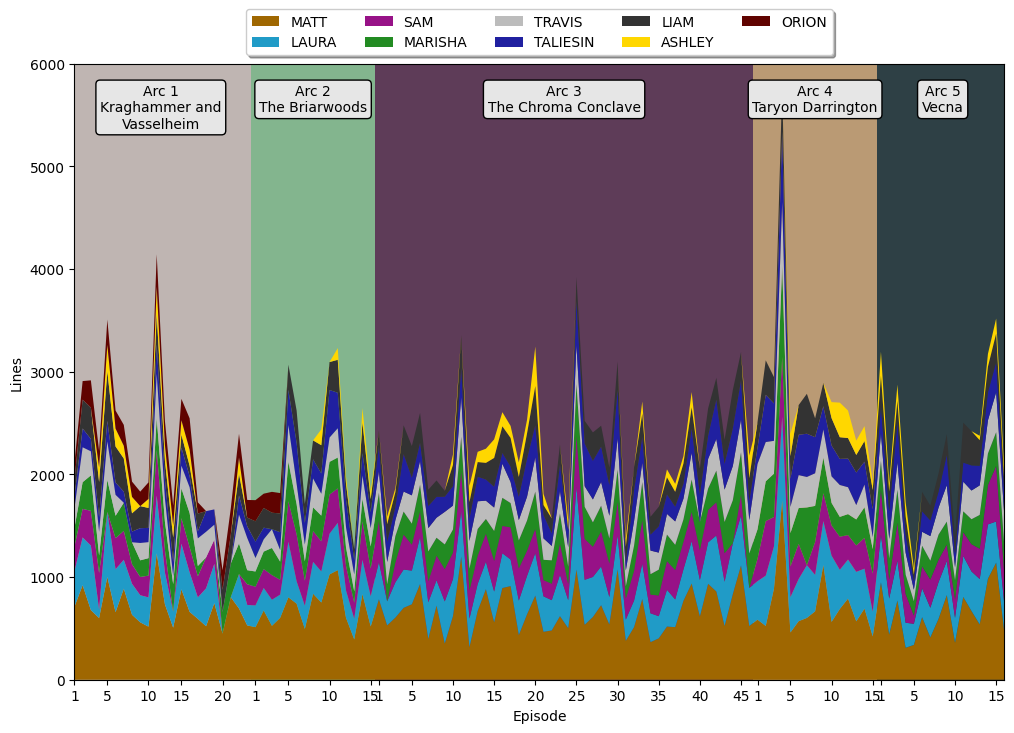

In [288]:
fig, ax = plt.subplots(figsize = (12, 8))

for _, row in arc_summary.iterrows():
    ax.add_patch(Rectangle(
        (row['episode_index_min'] - 0.5, 0),
        row['episode_index_max'] - row['episode_index_min'] + 1,
        6000,
        facecolor = row['arc_color']
    ))

ax.stackplot(
    episode_speakers.columns,
    episode_speakers.values,
    labels = episode_speakers.index,
    colors = vm_palette.values()
)
ax.legend(
    loc            = 'upper center',
    bbox_to_anchor = (0.5, 1.10),
    ncol           = 5,
    fancybox       = True,
    shadow         = True
)

xaxis_data  = arc_episodes[arc_episodes['episode_no'].isin([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])]

# Axis limits
ax.set(
    xlim   = (min(episode_speakers.columns), max(episode_speakers.columns)),
    xticks = xaxis_data['episode_index'],
    xticklabels = xaxis_data['episode_no'],
    xlabel = 'Episode',
    ylim   = (0, 6000),
    ylabel = 'Lines'
)

bbox = dict(boxstyle ="round", fc ="0.9")
for _, row in arc_summary.iterrows():
    ax.annotate(
        row['arc_name'].replace(': ', '\n').replace('and ', 'and\n'),
        ((row['episode_index_min'] + row['episode_index_max']) / 2, 5800),
        fontsize = 10,
        multialignment = 'center',
        horizontalalignment = 'center',
        verticalalignment = 'top',
        bbox = bbox)

plt.show()

Interesting, but a bit hard to read. We can see where Orion left the show in the Briarwood arc, as well as when ashley was gone. Let's scale each episode so we can see proportions instead of gross number of lines.

In [295]:
scaled_episode_speakers = episode_speakers.apply(lambda x: x / x.sum(), axis = 0)
scaled_episode_speakers

episode_index,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,105.0,106.0,107.0,108.0,109.0,110.0,111.0,112.0,113.0,114.0
speaker,,,,,,,,,,,,,,,,,,,,,
MATT,0.336977,0.316604,0.232510,0.269749,0.285348,0.250953,0.357373,0.327979,0.305131,0.268991,...,0.243068,0.295025,0.344482,0.259899,0.321885,0.276332,0.226431,0.310019,0.324048,0.225136
LAURA,0.164924,0.159849,0.215706,0.036355,0.180445,0.159420,0.113215,0.156477,0.144105,0.148283,...,0.170501,0.178109,0.139214,0.174226,0.159744,0.159438,0.186448,0.166667,0.113985,0.135082
SAM,0.114068,0.095565,0.115912,0.160682,0.000000,0.115561,0.113618,0.098446,0.097162,0.110302,...,0.161652,0.108458,0.066472,0.130310,0.092652,0.109459,0.124158,0.120983,0.153781,0.145967
MARISHA,0.085551,0.089378,0.118313,0.076302,0.088940,0.083143,0.110395,0.110881,0.088428,0.088450,...,0.108555,0.121393,0.093645,0.132469,0.080671,0.100372,0.138468,0.096408,0.093519,0.131618
TRAVIS,0.089829,0.116879,0.080590,0.103680,0.106899,0.077803,0.000000,0.000000,0.092249,0.081165,...,0.141593,0.131343,0.148411,0.091433,0.115415,0.115655,0.121212,0.102079,0.110858,0.146462
TALIESIN,0.055133,0.062908,0.041152,0.064183,0.057013,0.045767,0.043513,0.053886,0.078603,0.072320,...,0.090265,0.077612,0.123328,0.093593,0.074281,0.101198,0.080387,0.086641,0.083002,0.112321
LIAM,0.075570,0.096597,0.104938,0.153501,0.137970,0.133867,0.130137,0.092228,0.117358,0.100937,...,0.084366,0.088060,0.084448,0.118071,0.155351,0.137546,0.104798,0.077820,0.079306,0.046512
ASHLEY,0.000000,0.000000,0.000000,0.064183,0.073261,0.066362,0.049960,0.082902,0.000000,0.045786,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018098,0.039382,0.041501,0.056903
ORION,0.077947,0.062221,0.090878,0.071364,0.070125,0.067124,0.081789,0.077202,0.076965,0.083767,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


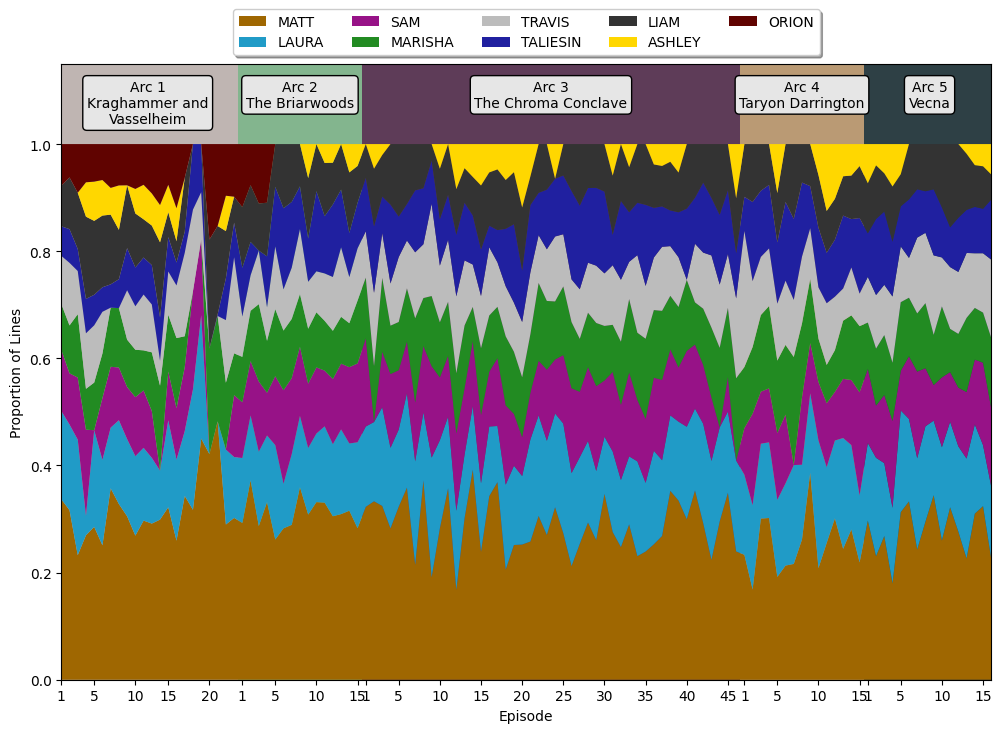

In [301]:
fig, ax = plt.subplots(figsize = (12, 8))

for _, row in arc_summary.iterrows():
    ax.add_patch(Rectangle(
        (row['episode_index_min'] - 0.5, 0),
        row['episode_index_max'] - row['episode_index_min'] + 1,
        2,
        facecolor = row['arc_color']
    ))

ax.stackplot(
    scaled_episode_speakers.columns,
    scaled_episode_speakers.values,
    labels = scaled_episode_speakers.index,
    colors = vm_palette.values()
)
ax.legend(
    loc            = 'upper center',
    bbox_to_anchor = (0.5, 1.10),
    ncol           = 5,
    fancybox       = True,
    shadow         = True
)

xaxis_data  = arc_episodes[arc_episodes['episode_no'].isin([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])]

# Axis limits
ax.set(
    xlim   = (min(scaled_episode_speakers.columns), max(scaled_episode_speakers.columns)),
    xticks = xaxis_data['episode_index'],
    xticklabels = xaxis_data['episode_no'],
    xlabel = 'Episode',
    ylim   = (0, 1.15),
    ylabel = 'Proportion of Lines'
)

bbox = dict(boxstyle ="round", fc ="0.9")
for _, row in arc_summary.iterrows():
    ax.annotate(
        row['arc_name'].replace(': ', '\n').replace('and ', 'and\n'),
        ((row['episode_index_min'] + row['episode_index_max']) / 2, 1.12),
        fontsize = 10,
        multialignment = 'center',
        horizontalalignment = 'center',
        verticalalignment = 'top',
        bbox = bbox)

plt.show()

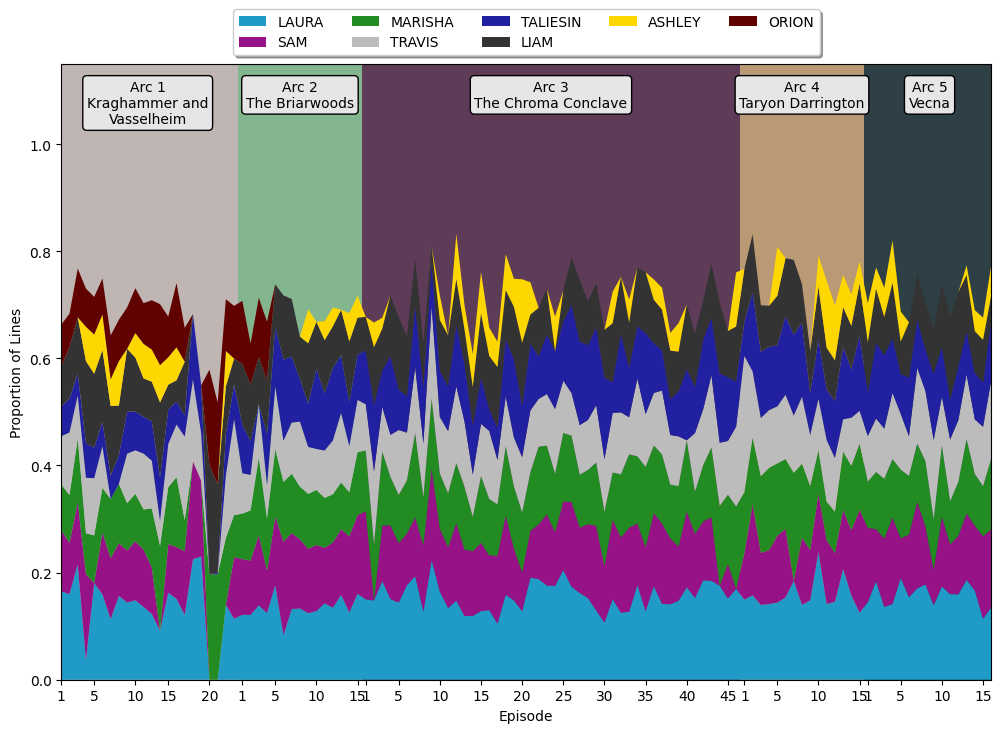

In [342]:
fig, ax = plt.subplots(figsize = (12, 8))

for _, row in arc_summary.iterrows():
    ax.add_patch(Rectangle(
        (row['episode_index_min'] - 0.5, 0),
        row['episode_index_max'] - row['episode_index_min'] + 1,
        2,
        facecolor = row['arc_color']
    ))

ax.stackplot(
    scaled_episode_speakers[1:].columns,
    scaled_episode_speakers[1:].values,
    labels = scaled_episode_speakers[1:].index,
    colors = list(vm_palette.values())[1:]
)
ax.legend(
    loc            = 'upper center',
    bbox_to_anchor = (0.5, 1.10),
    ncol           = 5,
    fancybox       = True,
    shadow         = True
)

xaxis_data  = arc_episodes[arc_episodes['episode_no'].isin([1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])]

# Axis limits
ax.set(
    xlim   = (min(scaled_episode_speakers[1:].columns), max(scaled_episode_speakers[1:].columns)),
    xticks = xaxis_data['episode_index'],
    xticklabels = xaxis_data['episode_no'],
    xlabel = 'Episode',
    ylim   = (0, 1.15),
    ylabel = 'Proportion of Lines'
)

bbox = dict(boxstyle ="round", fc ="0.9")
for _, row in arc_summary.iterrows():
    ax.annotate(
        row['arc_name'].replace(': ', '\n').replace('and ', 'and\n'),
        ((row['episode_index_min'] + row['episode_index_max']) / 2, 1.12),
        fontsize = 10,
        multialignment = 'center',
        horizontalalignment = 'center',
        verticalalignment = 'top',
        bbox = bbox)

plt.show()

It seems that the amount of speaking each person does is fairly consisten over time, with obvious episode-to-episode differences. We can also show this as timeseries per cast member.

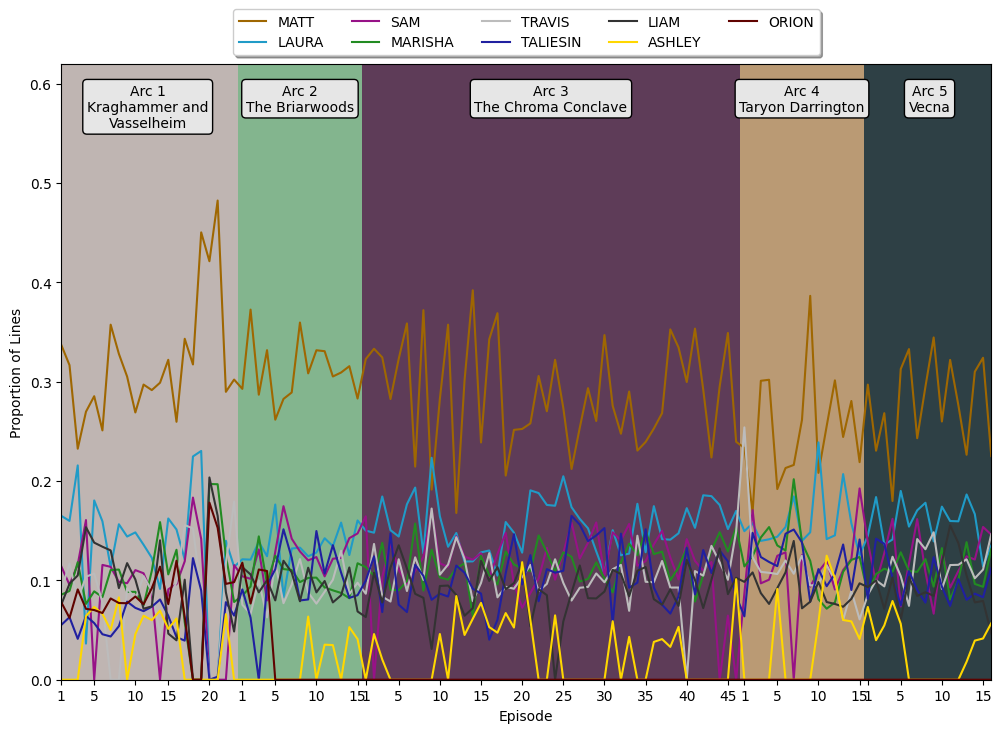

In [318]:
fig, ax = plt.subplots(figsize = (12, 8))

x = scaled_episode_speakers.columns

for _, row in arc_summary.iterrows():
    ax.add_patch(Rectangle(
        (row['episode_index_min'] - 0.5, 0),
        row['episode_index_max'] - row['episode_index_min'] + 1,
        2,
        facecolor = row['arc_color']
    ))

for i, row in scaled_episode_speakers.iterrows():
    ax.plot(x, row.values, color = vm_palette[i], label = i)
    
ax.legend(
    loc            = 'upper center',
    bbox_to_anchor = (0.5, 1.10),
    ncol           = 5,
    fancybox       = True,
    shadow         = True
)

# Axis limits
ax.set(
    xlim   = (min(scaled_episode_speakers.columns), max(scaled_episode_speakers.columns)),
    xticks = xaxis_data['episode_index'],
    xticklabels = xaxis_data['episode_no'],
    xlabel = 'Episode',
    ylim   = (0, 0.62),
    ylabel = 'Proportion of Lines'
)

bbox = dict(boxstyle ="round", fc ="0.9")
for _, row in arc_summary.iterrows():
    ax.annotate(
        row['arc_name'].replace(': ', '\n').replace('and ', 'and\n'),
        ((row['episode_index_min'] + row['episode_index_max']) / 2, 0.6),
        fontsize = 10,
        multialignment = 'center',
        horizontalalignment = 'center',
        verticalalignment = 'top',
        bbox = bbox)

plt.show()

This is still somewhat hard to read, but it makes it easier to see when someone was out.

## Per-Performer Analysis

We can also look at individual performers to see how long their lines are.

In [412]:
performer_fields = ['arc_no', 'episode_no', 'section_no', 'line_no', 'section', 'line']

def PlayerSummary(player, full_name):
    player_data = filtered_transcripts[filtered_transcripts['speaker'] == player].reset_index()[performer_fields]
    player_data.loc[:, 'linelength'] = [len(x) for x in player_data['line']]
    player_data.loc[:, 'nwords'] = [len(x.split()) for x in player_data['line']]
    return {'name': full_name, 'data': player_data, 'color': vm_palette[player]}

def PlayerHistogram(
    player_data,
    field       = 'linelength',
    field_label = 'Line Length',
    max_value   = 500,
    nbins       = 500
):
    fig, ax = plt.subplots(figsize = (12, 8))
    
    hist_data = player_data['data'][field]
    hist_data = hist_data[hist_data <= max_value]

    counts, bins = np.histogram(hist_data, bins = nbins)
    ax.stairs(counts, bins, color = player_data['color'])

    ax.set(
        xlim   = (0, max_value),
        xlabel = field_label,
        ylabel = 'Count',
        title  = f'{player_data["name"]} {field_label} Distribution'
    )
    plt.show()

### Matthew Mercer

In [399]:
matt_summary = PlayerSummary('MATT', 'Matthew Mercer')
matt_summary['data']

,arc_no,episode_no,section_no,line_no,section,line,linelength,nwords
0,1,1,2,1,Part I,All right! Let's jump on in. Thank you. Last w...,1793,320
1,1,1,2,3,Part I,"Yep, the barbarian for his first and only time...",215,41
2,1,1,2,5,Part I,Yeah. Essentially. Which managed to not turn i...,213,35
3,1,1,2,8,Part I,In the city of Kraghammer.,26,5
4,1,1,2,12,Part I,"Yeah, you were talking to the front guards at ...",827,135
...,...,...,...,...,...,...,...,...
77887,5,16,4,1228,Part II,Love you guys.,14,3
77888,5,16,4,1230,Part II,"And love you guys, each and every one of you o...",307,58
77889,5,16,4,1234,Part II,Yep!,4,1
77890,5,16,4,1238,Part II,"Love you, guys.",15,3


In [392]:
matt_summary['data'][matt_summary['data']['linelength'] > 1000]

,arc_no,episode_no,section_no,line_no,section,line,linelength,nwords
0,1,1,2,1,Part I,All right! Let's jump on in. Thank you. Last w...,1793,320
138,1,1,2,453,Part I,"“Ah, well I can have him do it.” She pokes one...",1080,203
404,1,1,4,286,Part II,"They nod, and let you pass. As you continue do...",2507,473
420,1,1,4,343,Part II,"“Inside, please.” Him and one other guard flan...",1359,256
1630,1,3,1,1,Part I,"Hey, everyone. Sorry about that little issue t...",1199,198
...,...,...,...,...,...,...,...,...
77589,5,16,2,836,Part I,"All right. You see, as you guys are discussing...",1321,238
77594,5,16,2,864,Part I,"The sun-glass roof, which currently has been s...",1648,299
77669,5,16,4,313,Part II,Retracted immediately. As she was here helping...,1670,314
77830,5,16,4,1017,Part II,"So following off that, the story of Taryon Dar...",1631,275


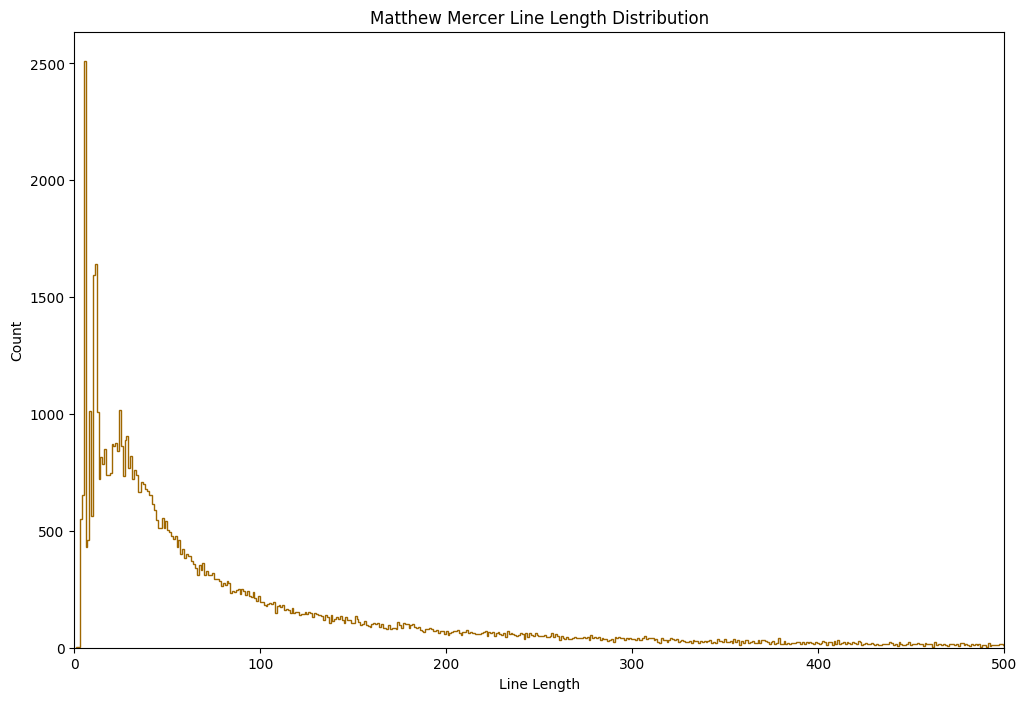

In [400]:
PlayerHistogram(matt_summary)

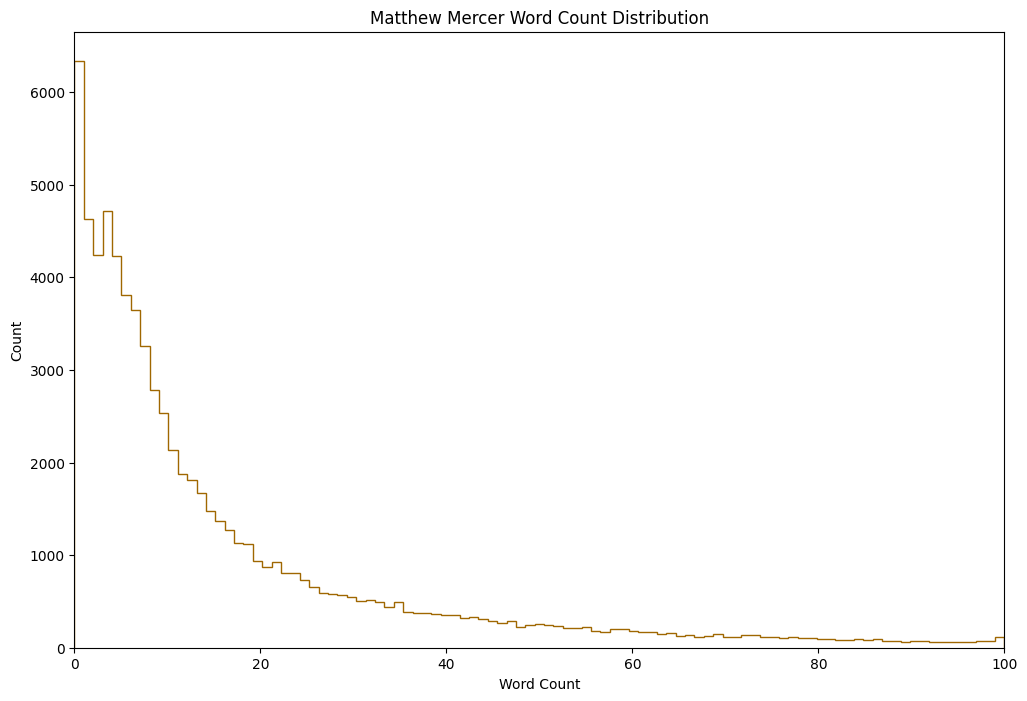

In [423]:
PlayerHistogram(matt_summary, 'nwords', 'Word Count', 100, 99)

### Laura Bailey

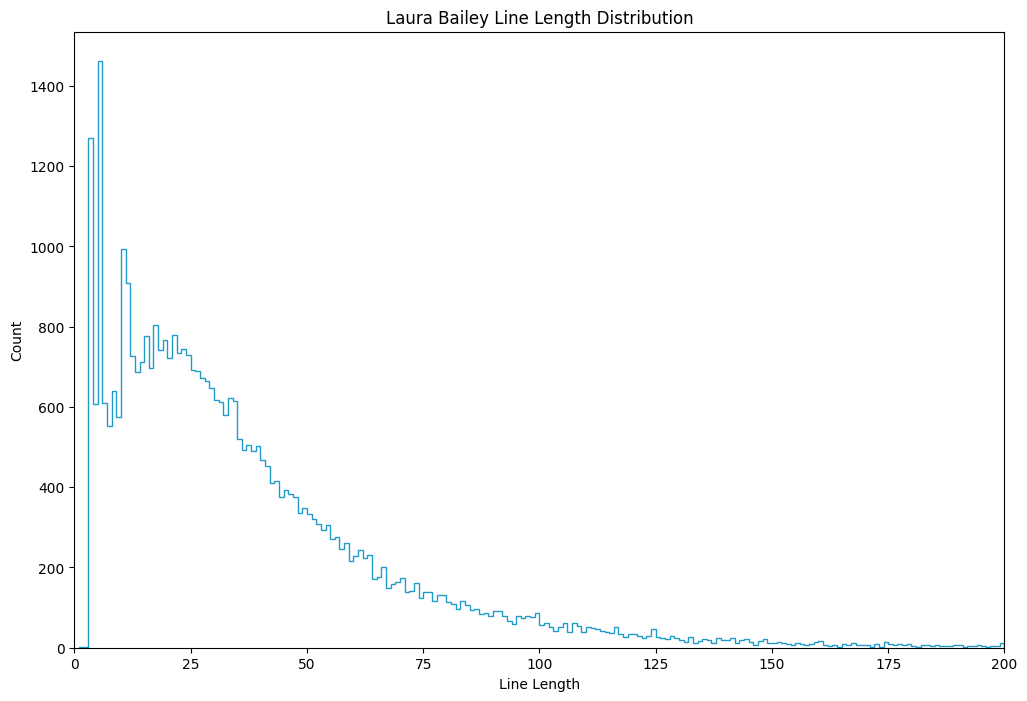

In [424]:
laura_summary = PlayerSummary('LAURA', 'Laura Bailey')
PlayerHistogram(laura_summary, max_value = 200, nbins = 199)

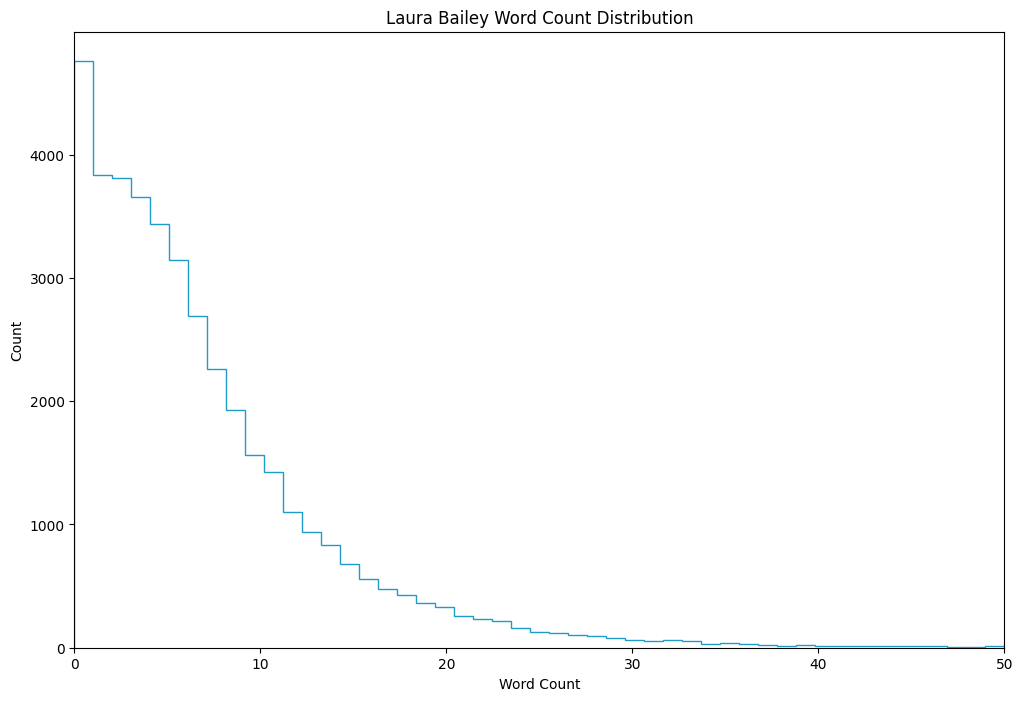

In [425]:
PlayerHistogram(laura_summary, 'nwords', 'Word Count', 50, 49)

### Sam Riegel

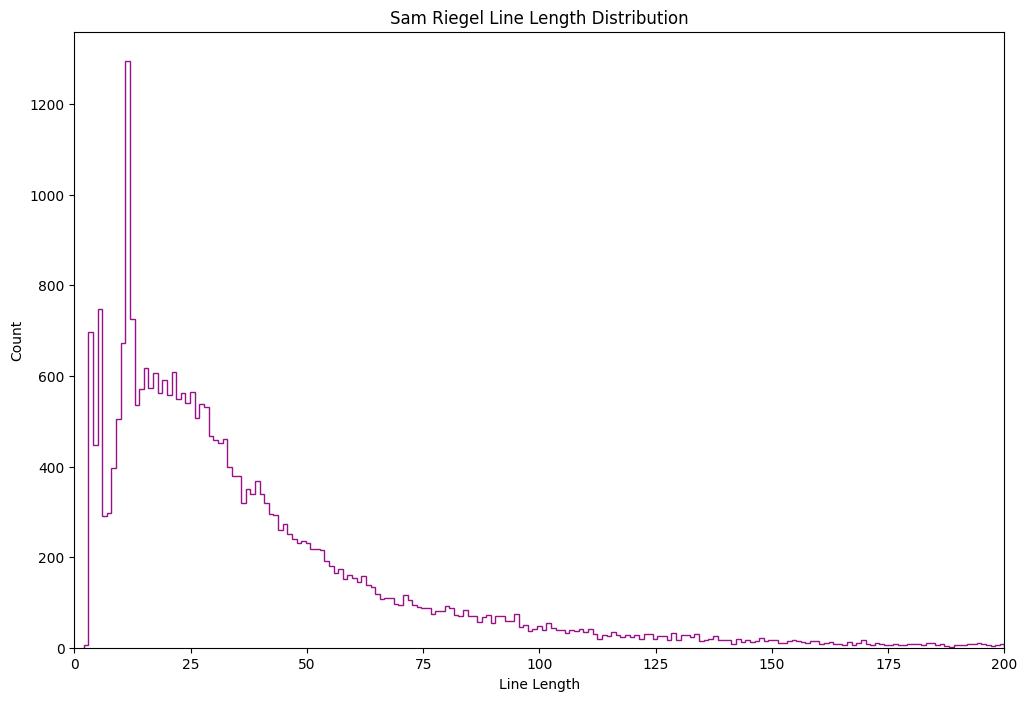

In [426]:
sam_summary = PlayerSummary('SAM', 'Sam Riegel')
PlayerHistogram(sam_summary, max_value = 200, nbins = 199)

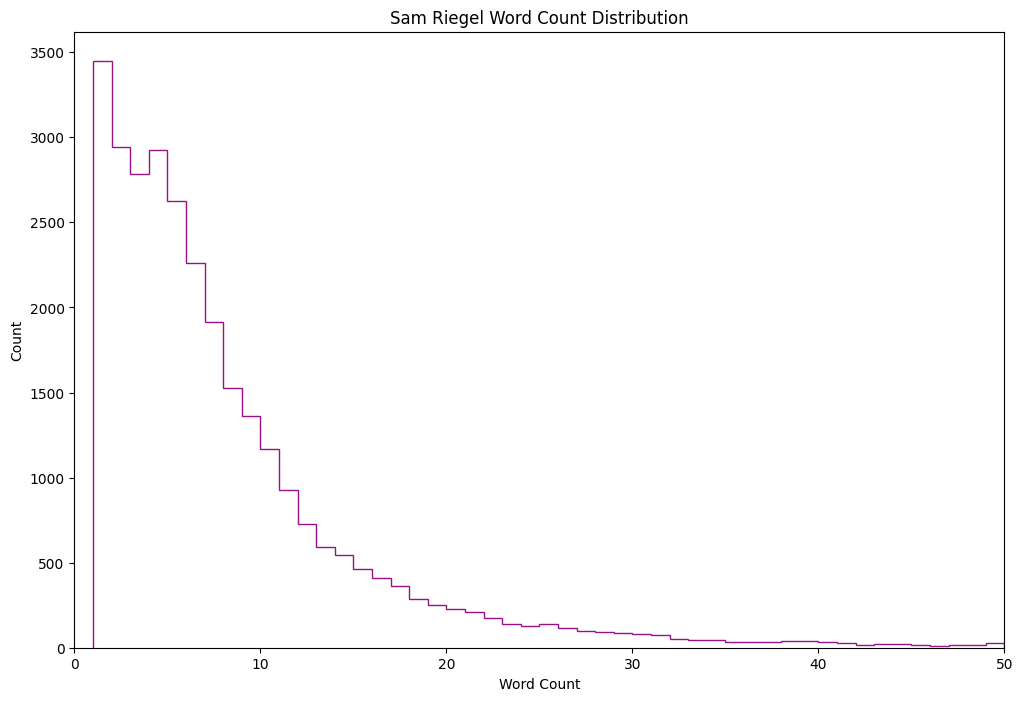

In [427]:
PlayerHistogram(sam_summary, 'nwords', 'Word Count', 50, 49)

### Marisha Ray

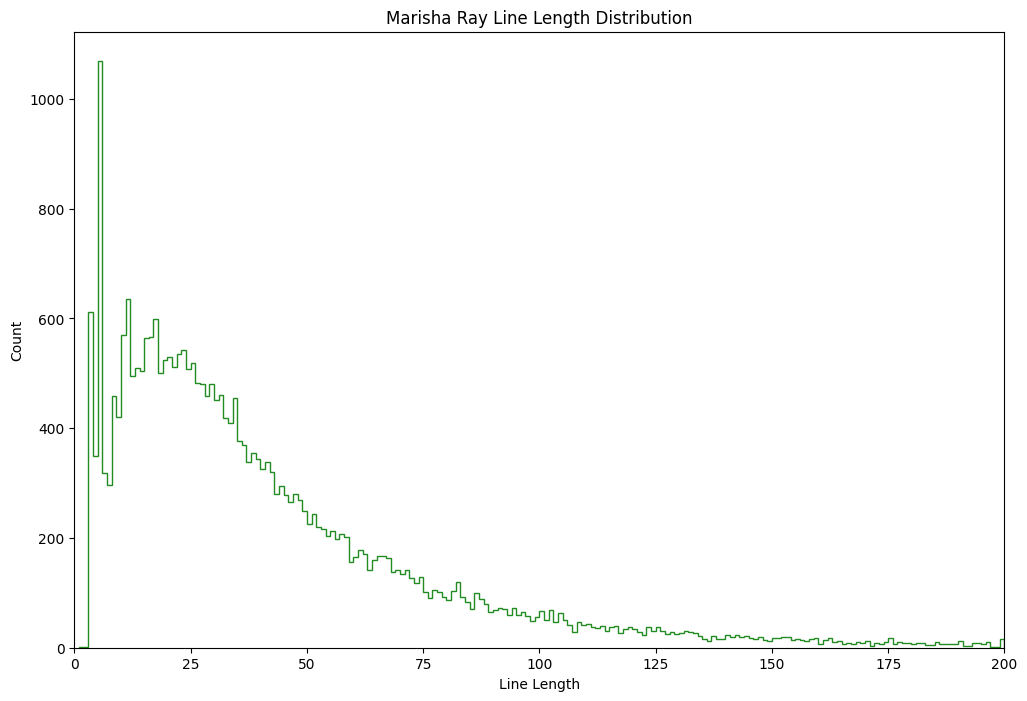

In [428]:
marisha_summary = PlayerSummary('MARISHA', 'Marisha Ray')
PlayerHistogram(marisha_summary, max_value = 200, nbins = 199)

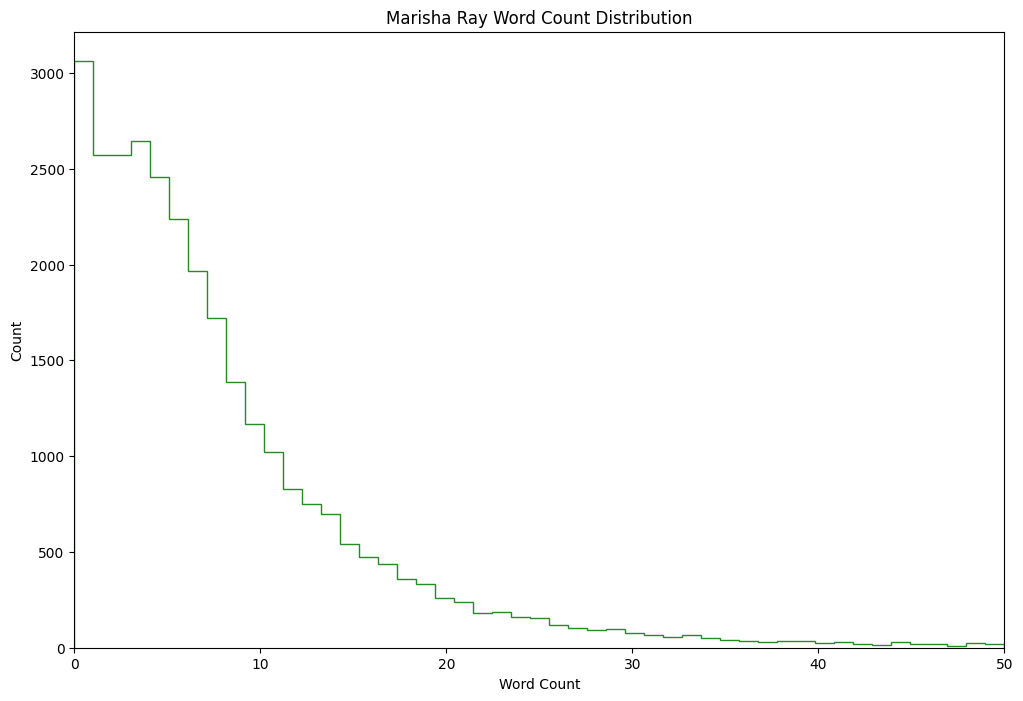

In [429]:
PlayerHistogram(marisha_summary, 'nwords', 'Word Count', 50, 49)

### Travis Willingham

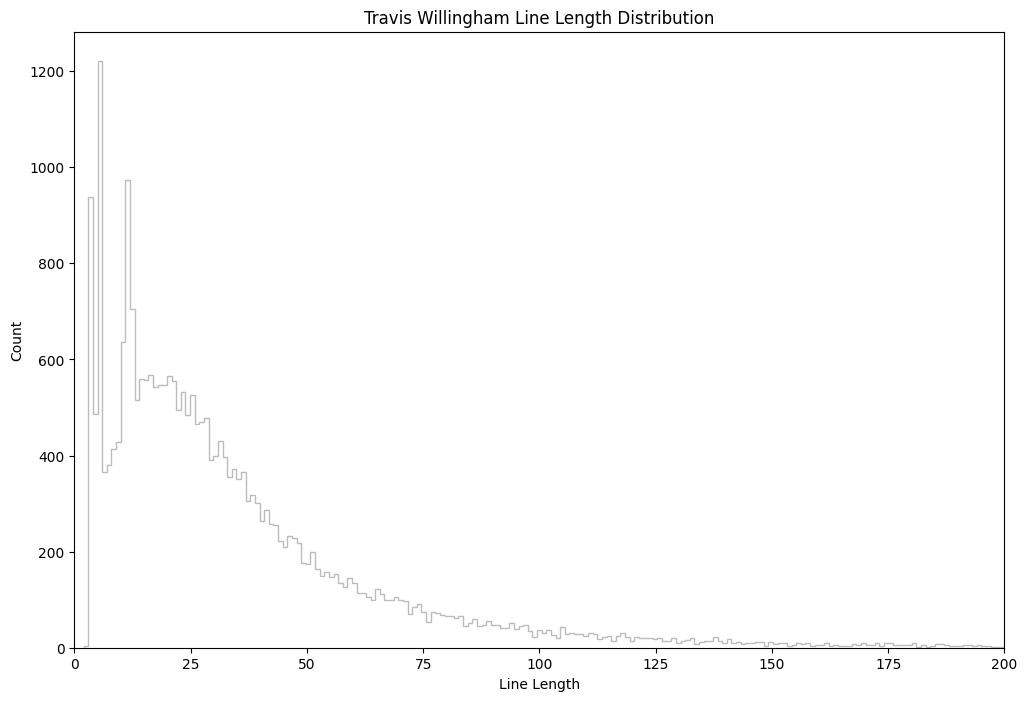

In [430]:
travis_summary = PlayerSummary('TRAVIS', 'Travis Willingham')
PlayerHistogram(travis_summary, max_value = 200, nbins = 199)

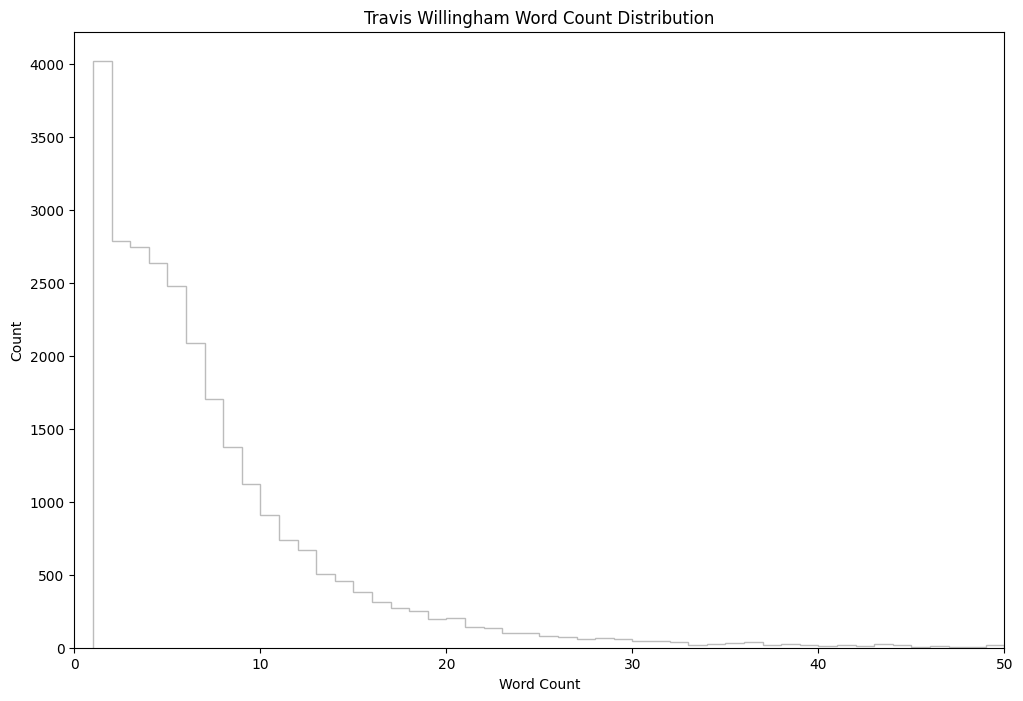

In [431]:
PlayerHistogram(travis_summary, 'nwords', 'Word Count', 50, 49)

### Taliesin Jaffe

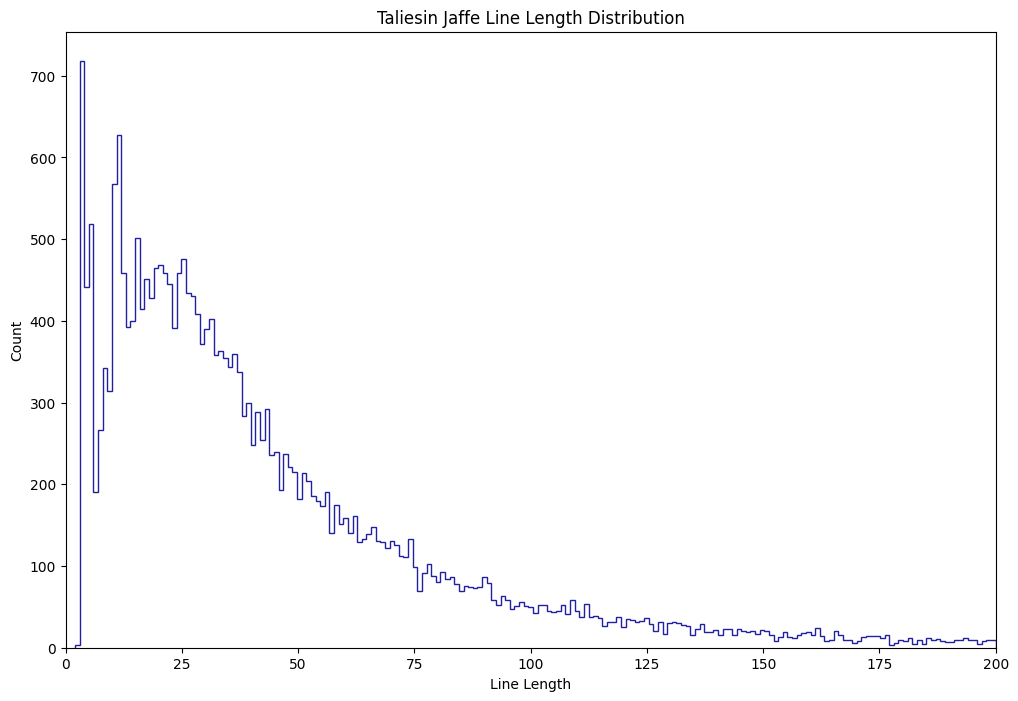

In [432]:
taliesin_summary = PlayerSummary('TALIESIN', 'Taliesin Jaffe')
PlayerHistogram(taliesin_summary, max_value = 200, nbins = 199)

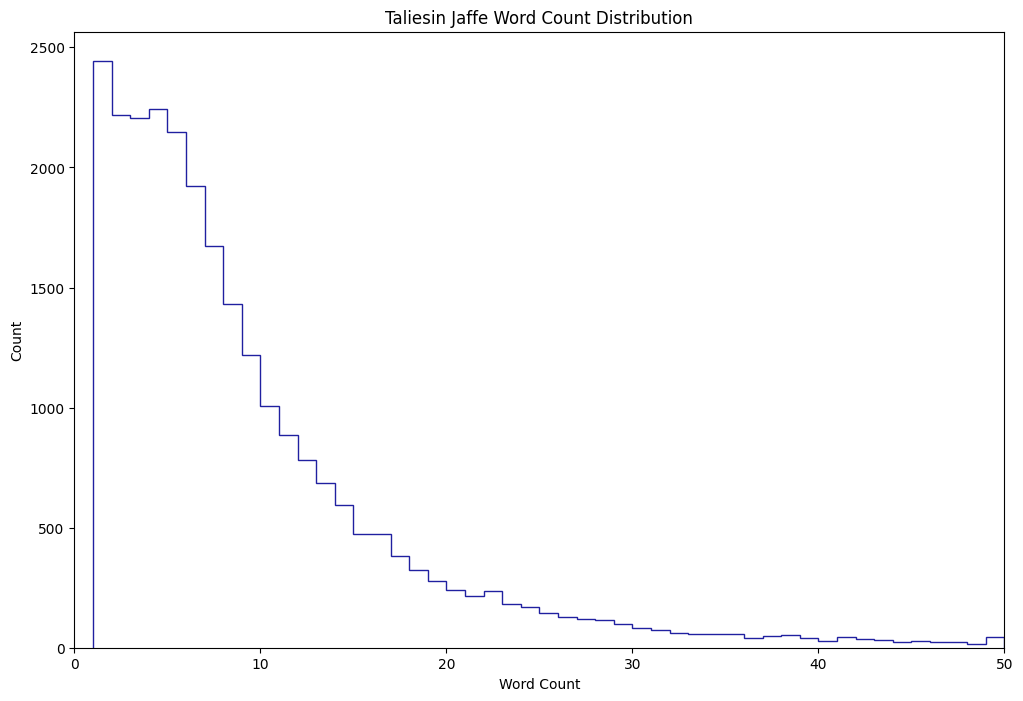

In [434]:
PlayerHistogram(taliesin_summary, 'nwords', 'Word Count', 50, 49)

### Liam O'Brien

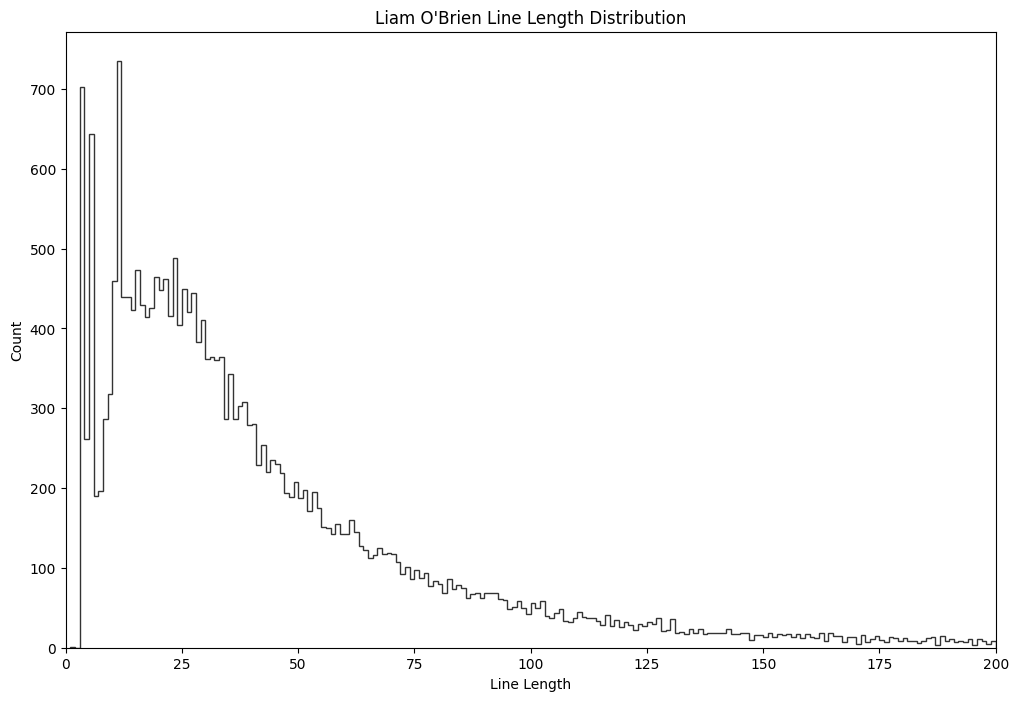

In [435]:
liam_summary = PlayerSummary('LIAM', "Liam O'Brien")
PlayerHistogram(liam_summary, max_value = 200, nbins = 199)

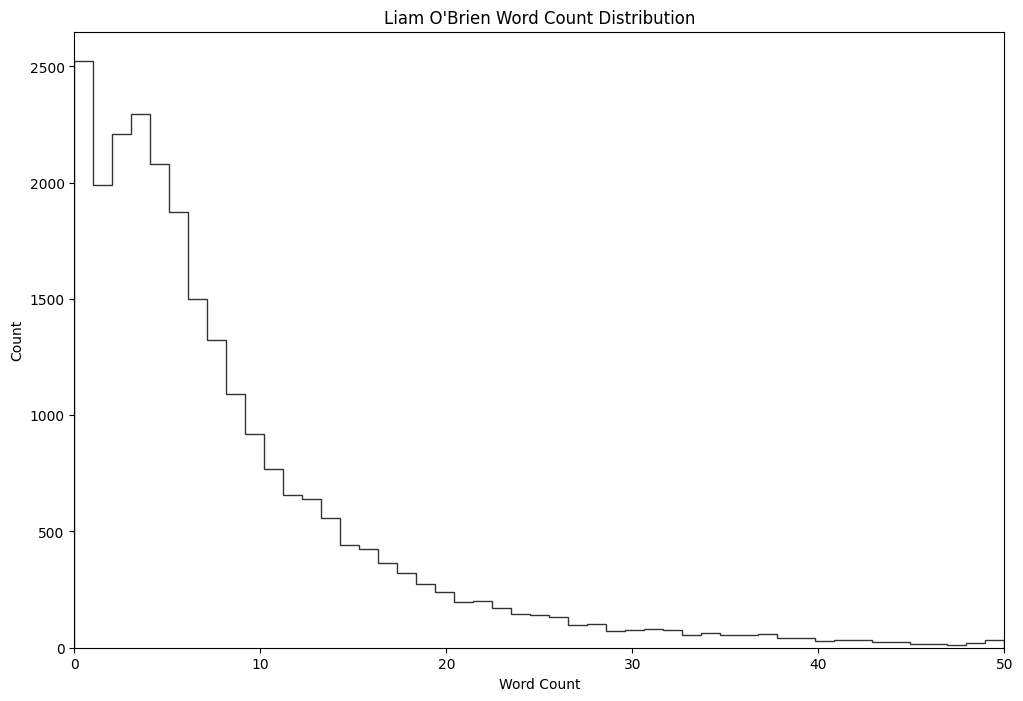

In [436]:
PlayerHistogram(liam_summary, 'nwords', 'Word Count', 50, 49)

### Ashely Johnson

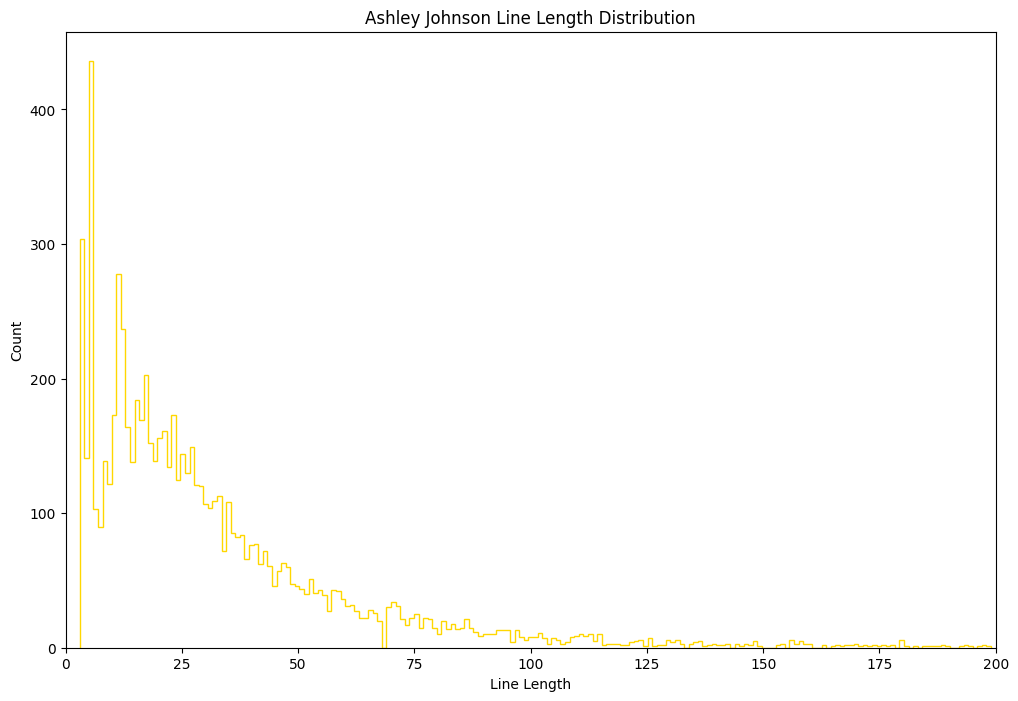

In [437]:
ashley_summary = PlayerSummary('ASHLEY', 'Ashley Johnson')
PlayerHistogram(ashley_summary, max_value = 200, nbins = 199)

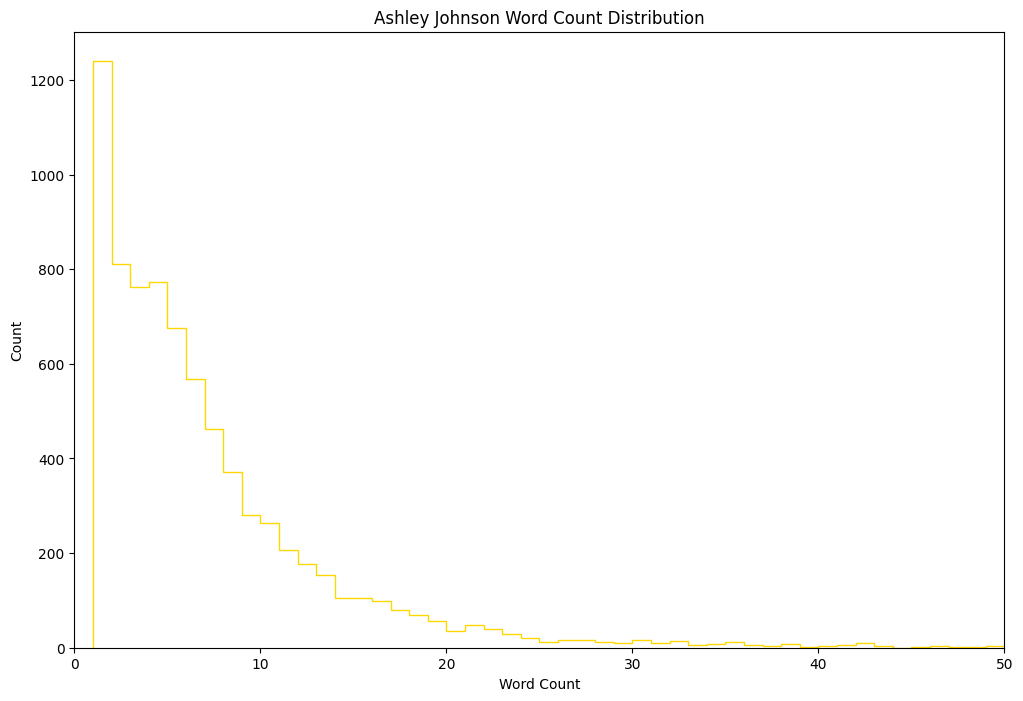

In [438]:
PlayerHistogram(ashley_summary, 'nwords', 'Word Count', 50, 49)

### Orion Acaba

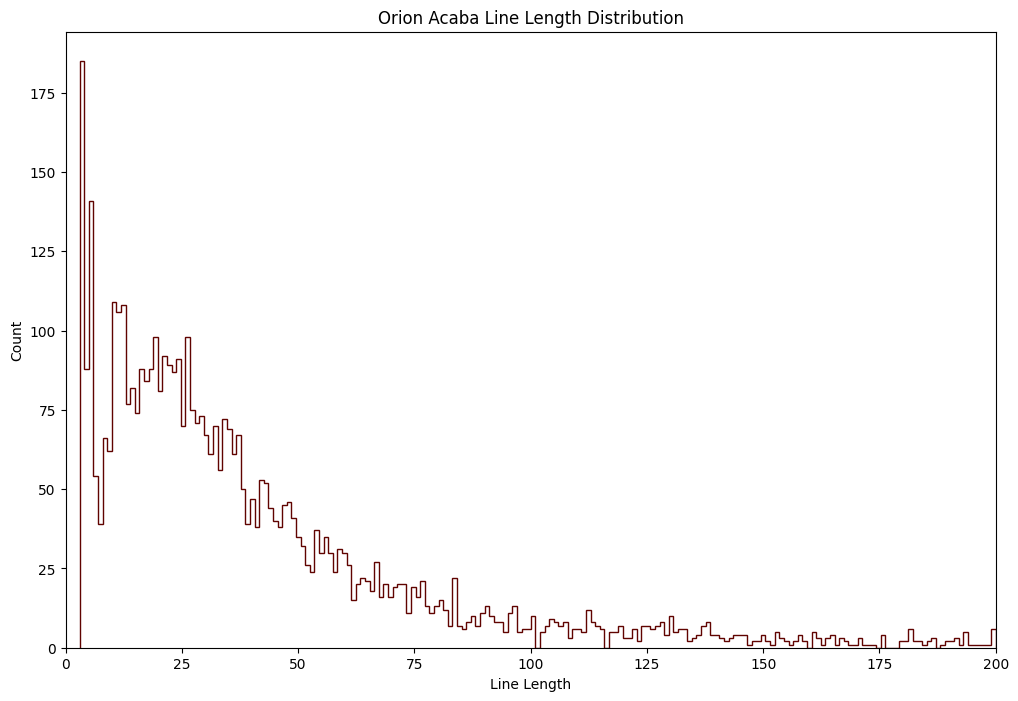

In [439]:
orion_summary = PlayerSummary('ORION', 'Orion Acaba')
PlayerHistogram(orion_summary, max_value = 200, nbins = 199)

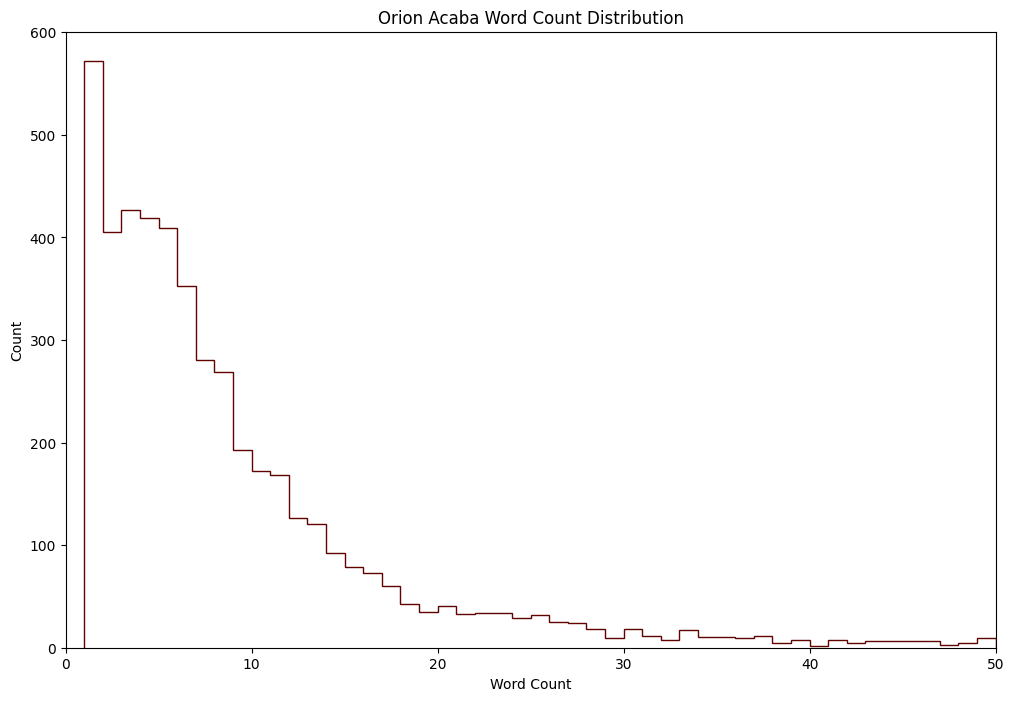

In [440]:
PlayerHistogram(orion_summary, 'nwords', 'Word Count', 50, 49)

### Comparing Players

Let's compare the players with more consistency with each other (so not Ashley or Orion).

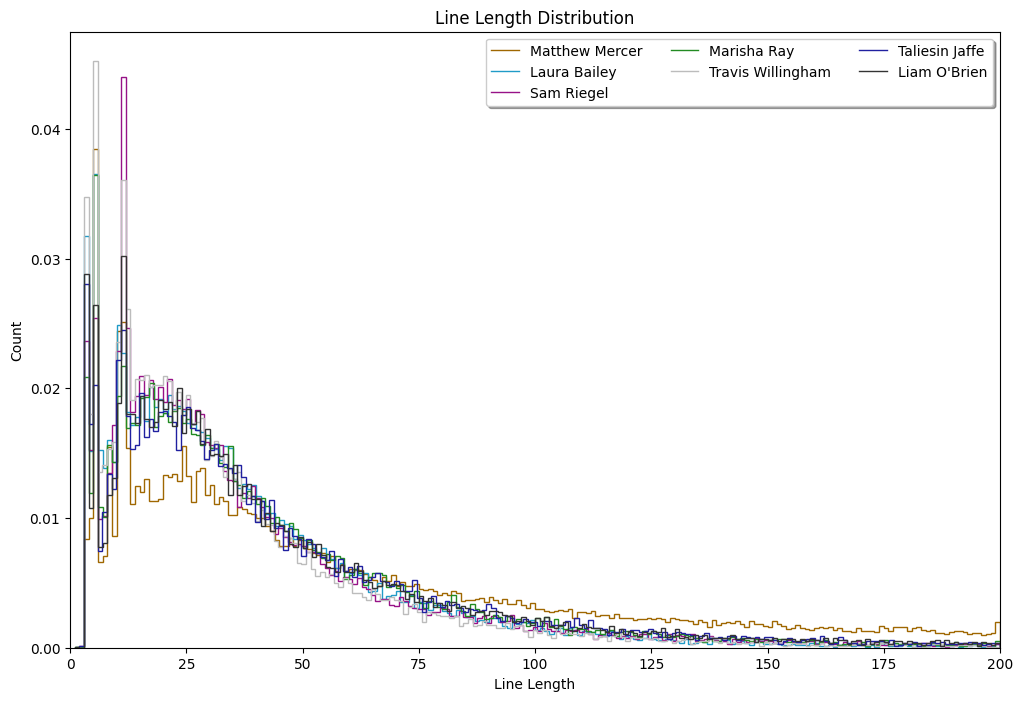

In [451]:
field       = 'linelength'
field_label = 'Line Length'
max_value   = 200
nbins       = 199

fig, ax = plt.subplots(figsize = (12, 8))

for player_data in [matt_summary, laura_summary, sam_summary, marisha_summary, travis_summary, taliesin_summary, liam_summary]:
    hist_data = player_data['data'][field]
    hist_data = hist_data[hist_data <= max_value]

    counts, bins = np.histogram(hist_data, bins = nbins)
    counts = counts / counts.sum()
    ax.stairs(counts, bins, color = player_data['color'], label = player_data['name'])

ax.legend(
    loc            = 'upper right',
    ncol           = 3,
    fancybox       = True,
    shadow         = True
)

ax.set(
    xlim   = (0, max_value),
    xlabel = field_label,
    ylabel = 'Count',
    title  = f'{field_label} Distribution'
)

plt.show()

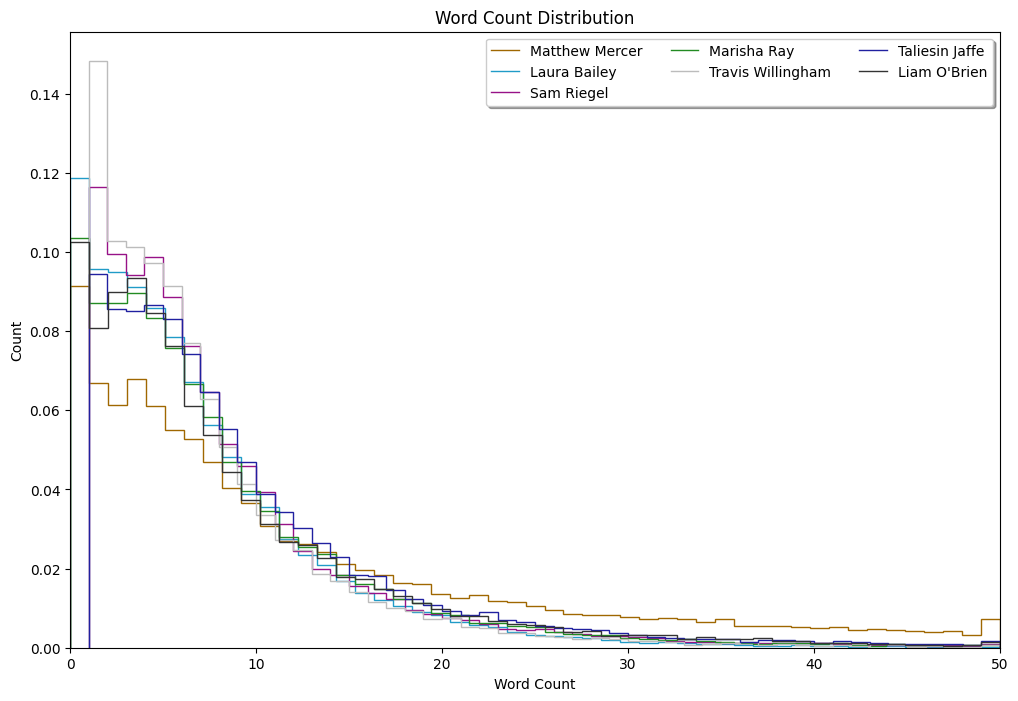

In [452]:
field       = 'nwords'
field_label = 'Word Count'
max_value   = 50
nbins       = 49

fig, ax = plt.subplots(figsize = (12, 8))

for player_data in [matt_summary, laura_summary, sam_summary, marisha_summary, travis_summary, taliesin_summary, liam_summary]:
    hist_data = player_data['data'][field]
    hist_data = hist_data[hist_data <= max_value]

    counts, bins = np.histogram(hist_data, bins = nbins)
    counts = counts / counts.sum()
    ax.stairs(counts, bins, color = player_data['color'], label = player_data['name'])

ax.legend(
    loc            = 'upper right',
    ncol           = 3,
    fancybox       = True,
    shadow         = True
)

ax.set(
    xlim   = (0, max_value),
    xlabel = field_label,
    ylabel = 'Count',
    title  = f'{field_label} Distribution'
)

plt.show()

You can clearly see that Matt tends to have longer dialogue than the others while Sam and Travis have shorter lines.